In [1]:
#matplotlib notebook

In [2]:
import csv, os, requests, time, pandas as pd, matplotlib.pyplot as plt, numpy as np
import seaborn as sns
from config import *
#plt.style.use('fivethirtyeight')

In [3]:
yelpapi_csv = os.path.join("yelpapidata.csv")
yelp_raw = pd.read_csv(yelpapi_csv)
yelp_raw.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,142,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/gfK2DK...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466
3,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,16,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287
4,"Montgomery, Alabama",American,TmPADgXsze5_gfTZPZ24vQ,Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/3WRpNu...,https://www.yelp.com/biz/southern-comfort-hope...,False,193,4.5,$$,32.269824,-86.363997,210 Wasden Rd,Hope Hull,AL,36043,US,(334) 280-0012


In [4]:
#yelp_raw.drop(columns=['disp_ph', 'lat', 'long', 'y_id'])
yelp_raw.columns

Index(['search_city', 'search_cuisine', 'y_id', 'name', 'image_url', 'url',
       'closed', 'review_count', 'rating', 'price', 'lat', 'long', 'add1',
       'city', 'state', 'zip_code', 'country', 'disp_ph'],
      dtype='object')

In [5]:
df= yelp_raw[['search_city', 'search_cuisine','country','y_id','review_count', 'rating','city', 'price', 'state']]
df.head()
# dfsort = df.sort_values("review_count", ascending=False)
# dfsort.head()

,search_city,search_cuisine,country,y_id,review_count,rating,city,price,state
0,"Montgomery, Alabama",American,US,BhPj9fLZph1TcofvuTZT1w,142,4.5,Montgomery,$,AL
1,"Montgomery, Alabama",American,US,4uVYV49MDmm3tunRg6hnew,51,4.5,Montgomery,$,AL
2,"Montgomery, Alabama",American,US,s2uIZz572lvzeeaT40xm5g,14,4.0,Millbrook,$$,AL
3,"Montgomery, Alabama",American,US,u-pZS8ZvEm8QwJIMrf1Wbw,16,5.0,Montgomery,$,AL
4,"Montgomery, Alabama",American,US,TmPADgXsze5_gfTZPZ24vQ,193,4.5,Hope Hull,$$,AL


In [6]:
#select the df with a higer reviwe count and greater 4 rrating in us
df_higer_RC=df.loc[(df['review_count'] > 4000 ) & (df[ 'rating'] > 4 ) & (df['country'] == 'US' )]
df_higer_RC

,search_city,search_cuisine,country,y_id,review_count,rating,city,price,state
5053,"Honolulu, Hawaii",Japanese,US,o3edBEVjRcYJnQWrSFd9Bg,9465,4.5,Honolulu,$,HI
11349,"Boston, Massachusetts",American,US,y2w6rFaO0XEiG5mFfOsiFA,4995,4.5,Boston,$$$,MA
11618,"Boston, Massachusetts",Cajun,US,y2w6rFaO0XEiG5mFfOsiFA,4995,4.5,Boston,$$$,MA
15151,"Carson City, Nevada",Italian,US,PseBu4kUFheNa9WMq-u7FA,4386,4.5,South Lake Tahoe,$$,CA
15192,"Carson City, Nevada",Soul,US,PseBu4kUFheNa9WMq-u7FA,4386,4.5,South Lake Tahoe,$$,CA
15262,"Carson City, Nevada",Thai,US,PseBu4kUFheNa9WMq-u7FA,4386,4.5,South Lake Tahoe,$$,CA
15270,"Carson City, Nevada",Greek,US,PseBu4kUFheNa9WMq-u7FA,4386,4.5,South Lake Tahoe,$$,CA
22656,"Nashville, Tennessee",American,US,GXFMD0Z4jEVZBCsbPf4CTQ,5360,4.5,Nashville,$$,TN
22943,"Nashville, Tennessee",Cajun,US,GXFMD0Z4jEVZBCsbPf4CTQ,5360,4.5,Nashville,$$,TN
22962,"Nashville, Tennessee",Soul,US,GXFMD0Z4jEVZBCsbPf4CTQ,5360,4.5,Nashville,$$,TN


In [7]:
# check for missing values
#df.count()

In [8]:
# Drop all rows with missing price values
dfsort = df.dropna(how='any')
dfsort.head()

,search_city,search_cuisine,country,y_id,review_count,rating,city,price,state
0,"Montgomery, Alabama",American,US,BhPj9fLZph1TcofvuTZT1w,142,4.5,Montgomery,$,AL
1,"Montgomery, Alabama",American,US,4uVYV49MDmm3tunRg6hnew,51,4.5,Montgomery,$,AL
2,"Montgomery, Alabama",American,US,s2uIZz572lvzeeaT40xm5g,14,4.0,Millbrook,$$,AL
3,"Montgomery, Alabama",American,US,u-pZS8ZvEm8QwJIMrf1Wbw,16,5.0,Montgomery,$,AL
4,"Montgomery, Alabama",American,US,TmPADgXsze5_gfTZPZ24vQ,193,4.5,Hope Hull,$$,AL


In [9]:
df.describe()

,review_count,rating
count,27849.000000,27849.000000
mean,179.901540,3.963859
std,298.801616,0.601631
min,1.000000,1.000000
25%,30.000000,3.500000
50%,89.000000,4.000000
75%,215.000000,4.500000
max,9465.000000,5.000000


In [10]:
# Pie chart, where the Review count with the  rating



In [11]:
#yelp_format_rd1 = yelp_raw.copy()
#yelp_format_rd1["review_count"] = yelp_format_rd1.loc[:, "review_count"].astype(float)
#yelp_format_rd1["rating"] = yelp_format_rd1.loc[:, "rating"].astype(float)


yelp_format_rd1 = dfsort.copy()
yelp_format_rd1['price_attribute'] = yelp_format_rd1['price'].replace(
    {'$': '1.Affordable', '$$': '2.Moderate', '$$$': '3.Expensive'})
yelp_format_rd1.head()

,search_city,search_cuisine,country,y_id,review_count,rating,city,price,state,price_attribute
0,"Montgomery, Alabama",American,US,BhPj9fLZph1TcofvuTZT1w,142,4.5,Montgomery,$,AL,1.Affordable
1,"Montgomery, Alabama",American,US,4uVYV49MDmm3tunRg6hnew,51,4.5,Montgomery,$,AL,1.Affordable
2,"Montgomery, Alabama",American,US,s2uIZz572lvzeeaT40xm5g,14,4.0,Millbrook,$$,AL,2.Moderate
3,"Montgomery, Alabama",American,US,u-pZS8ZvEm8QwJIMrf1Wbw,16,5.0,Montgomery,$,AL,1.Affordable
4,"Montgomery, Alabama",American,US,TmPADgXsze5_gfTZPZ24vQ,193,4.5,Hope Hull,$$,AL,2.Moderate


In [12]:
yelp_format_rd1.columns

Index(['search_city', 'search_cuisine', 'country', 'y_id', 'review_count',
       'rating', 'city', 'price', 'state', 'price_attribute'],
      dtype='object')

In [13]:
yelp_format_rd1.head()

,search_city,search_cuisine,country,y_id,review_count,rating,city,price,state,price_attribute
0,"Montgomery, Alabama",American,US,BhPj9fLZph1TcofvuTZT1w,142,4.5,Montgomery,$,AL,1.Affordable
1,"Montgomery, Alabama",American,US,4uVYV49MDmm3tunRg6hnew,51,4.5,Montgomery,$,AL,1.Affordable
2,"Montgomery, Alabama",American,US,s2uIZz572lvzeeaT40xm5g,14,4.0,Millbrook,$$,AL,2.Moderate
3,"Montgomery, Alabama",American,US,u-pZS8ZvEm8QwJIMrf1Wbw,16,5.0,Montgomery,$,AL,1.Affordable
4,"Montgomery, Alabama",American,US,TmPADgXsze5_gfTZPZ24vQ,193,4.5,Hope Hull,$$,AL,2.Moderate


In [14]:
#yelp_format_rd1.count()

In [15]:
#yelp_format_rd1.dtypes

In [16]:
yelp_gb_cities = yelp_format_rd1.groupby(['search_city'])
yelp_gb_cities.sum().head()

,review_count,rating
search_city,,
"Albany, New York",60481,2070.0
"Annapolis, Maryland",96312,1678.0
"Atlanta, Georgia",300490,3478.5
"Augusta, Maine",15038,801.0
"Austin, Texas",301843,3143.0


In [17]:
# view some basic statistical analysis 
#yelp_gb_cities.describe()

In [18]:
yelp_gb_cuisines = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisines.sum().head()

,review_count,rating
search_cuisine,,
American,669403,8133.0
Cajun,365483,4869.0
Caribbean,86812,2156.5
Chinese,222826,6340.5
French,249987,4094.0


In [19]:
yelp_gb_price = yelp_format_rd1.groupby(['price'])
yelp_gb_price.sum().head()

,review_count,rating
price,,
$,728583,25750.5
$$,3848590,63495.5
$$$,329074,3937.5
$$$$,27713,420.5


In [20]:
yelp_gb_citiescount = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiescount.count().head()

,search_cuisine,country,y_id,review_count,rating,city,price,state,price_attribute
search_city,,,,,,,,,
"Albany, New York",531,531,531,531,531,531,531,531,531
"Annapolis, Maryland",441,441,441,441,441,441,441,441,441
"Atlanta, Georgia",861,861,861,861,861,861,861,861,861
"Augusta, Maine",210,210,210,210,210,210,210,210,210
"Austin, Texas",770,770,770,770,770,770,770,770,770


In [21]:
yelp_gb_cuisinescount = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinescount.count().head()

,search_city,country,y_id,review_count,rating,city,price,state,price_attribute
search_cuisine,,,,,,,,,
American,2054,2054,2054,2054,2054,2054,2054,2054,2054
Cajun,1277,1277,1277,1277,1277,1277,1277,1277,1277
Caribbean,532,532,532,532,532,532,532,532,532
Chinese,1721,1721,1721,1721,1721,1721,1721,1721,1721
French,1018,1018,1018,1018,1018,1018,1018,1018,1018


In [22]:
yelp_gb_citiesavg = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiesavg.mean().head()

,review_count,rating
search_city,,
"Albany, New York",113.900188,3.898305
"Annapolis, Maryland",218.394558,3.804989
"Atlanta, Georgia",349.001161,4.040070
"Augusta, Maine",71.609524,3.814286
"Austin, Texas",392.003896,4.081818


In [23]:
yelp_gb_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinesavg.mean().head()

,review_count,rating
search_cuisine,,
American,325.902142,3.959591
Cajun,286.204385,3.812843
Caribbean,163.180451,4.053571
Chinese,129.474724,3.684195
French,245.566798,4.021611


In [24]:
yelp_gb2_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb2_citiesavg.mean().head()

review_count    rating
search_city      search_cuisine                        
Albany, New York American          175.025641  4.064103
                 Cajun             154.578947  3.684211
                 Caribbean          35.923077  3.576923
                 Chinese            93.577778  3.600000
                 French             86.545455  3.863636

In [25]:
yelp_gb2_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb2_cuisinesavg.mean().head()

review_count    rating
search_cuisine search_city                                
American       Albany, New York       175.025641  4.064103
               Annapolis, Maryland    298.000000  3.882979
               Atlanta, Georgia       872.155556  4.188889
               Augusta, Maine          61.500000  3.894737
               Austin, Texas          843.372093  4.197674

In [26]:
yelp_gb3_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb3_citiesavg.mean().head()

review_count    rating
search_city      search_cuisine                        
Albany, New York American          175.025641  4.064103
                 Cajun             154.578947  3.684211
                 Caribbean          35.923077  3.576923
                 Chinese            93.577778  3.600000
                 French             86.545455  3.863636

In [27]:
yelp_gb3_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb3_cuisinesavg.mean().head()

review_count    rating
search_cuisine search_city                                
American       Albany, New York       175.025641  4.064103
               Annapolis, Maryland    298.000000  3.882979
               Atlanta, Georgia       872.155556  4.188889
               Augusta, Maine          61.500000  3.894737
               Austin, Texas          843.372093  4.197674

In [28]:
#This is where we are going to start charting, I have provided some exmaples for you. 


In [29]:
# chartme1 = yelp_gb_cuisinesavg['rating'].mean()
# cuisine_chart = chartme1.plot(kind='bar', title='mean rating by cuisine')
# cuisine_chart.set_xlabel("cuisine group")
# cuisine_chart.set_ylabel("yelp rating")

# plt.show()
# plt.tight_layout()

In [30]:
# chartme2 = yelp_gb_citiesavg['rating'].mean()
# cuisine_chart = chartme2.plot(kind='bar', title='mean rating by cuisine')
# cuisine_chart.set_xlabel("yelp rating")
# cuisine_chart.set_ylabel('our cities')

# plt.ylim((0,5))
# plt.xlim((0,40))
# plt.show()
# plt.tight_layout()


In [31]:
df.columns

Index(['search_city', 'search_cuisine', 'country', 'y_id', 'review_count',
       'rating', 'city', 'price', 'state'],
      dtype='object')

In [32]:
df.head()
df['country'].value_counts()

US    27841
VI        4
GB        2
GU        1
FR        1
Name: country, dtype: int64

In [33]:
df_US=df.loc[(df['country'] == 'US') & (df['review_count']> 1000)]
df_US.head()
df.head()

,search_city,search_cuisine,country,y_id,review_count,rating,city,price,state
0,"Montgomery, Alabama",American,US,BhPj9fLZph1TcofvuTZT1w,142,4.5,Montgomery,$,AL
1,"Montgomery, Alabama",American,US,4uVYV49MDmm3tunRg6hnew,51,4.5,Montgomery,$,AL
2,"Montgomery, Alabama",American,US,s2uIZz572lvzeeaT40xm5g,14,4.0,Millbrook,$$,AL
3,"Montgomery, Alabama",American,US,u-pZS8ZvEm8QwJIMrf1Wbw,16,5.0,Montgomery,$,AL
4,"Montgomery, Alabama",American,US,TmPADgXsze5_gfTZPZ24vQ,193,4.5,Hope Hull,$$,AL


In [34]:
# count the Number of Businesss listed in different Cities
# and count the Cities with most reviwe and best ratings and find find top 50 cities by reviwe



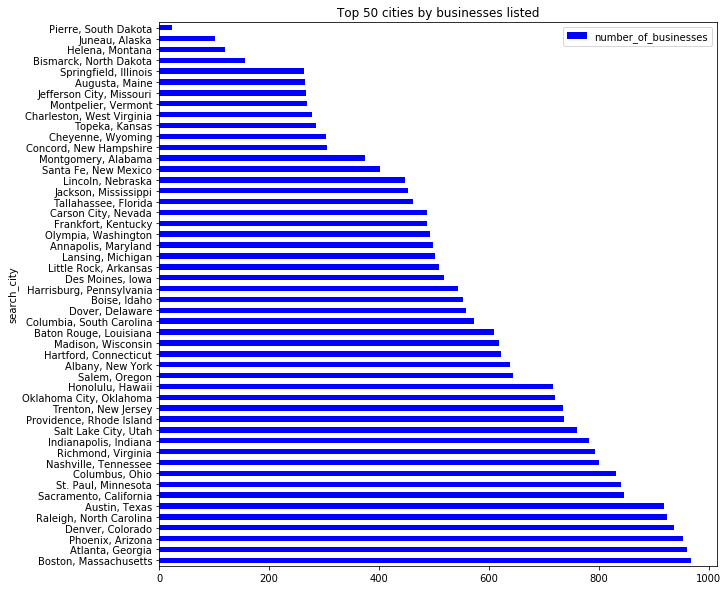

In [35]:
# Number of Businesss listed in different Cities
df['country'].value_counts()
df['review_count'].value_counts()
city_business_counts = df[['search_city', 'y_id']].groupby(['search_city'])\
['y_id'].agg('count').sort_values(ascending=False)
city_business_counts = pd.DataFrame(data=city_business_counts)
city_business_counts
city_business_counts.rename(columns={'y_id' : 'number_of_businesses'}, inplace=True)
city_business_counts
city_business_counts[0:50].sort_values(ascending=False, by="number_of_businesses")\
.plot(kind='barh', stacked=False, figsize=[10, 10], colormap='winter')
plt.title('Top 50 cities by businesses listed')
plt.show()

In [36]:
#Cities with most reviwe and best ratings
city_business_reviews = df[['search_city', 'review_count', 'rating']].groupby(['search_city']).\
agg({'review_count': 'sum', 'rating': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head()

,review_count,rating
search_city,,
"Sacramento, California",363136,4.109338
"Phoenix, Arizona",350763,4.169465
"Boston, Massachusetts",342497,4.020683
"Honolulu, Hawaii",307274,4.087989
"Austin, Texas",306307,4.129085


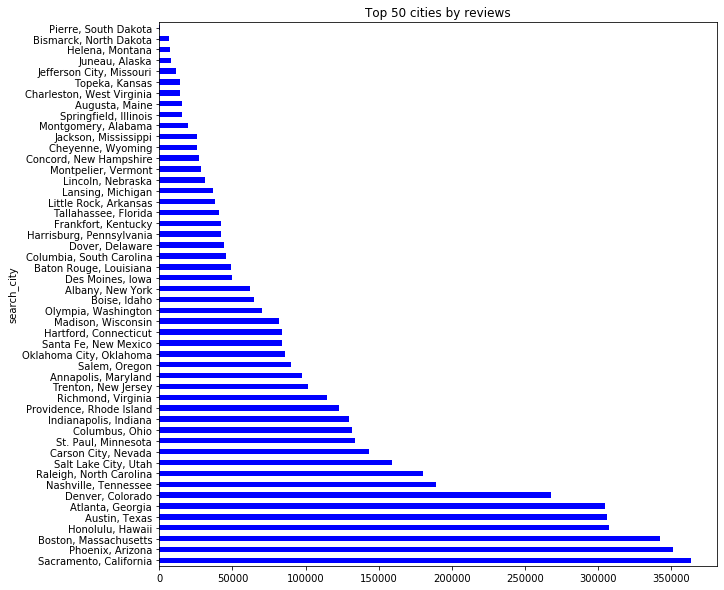

In [37]:
city_business_reviews['review_count'][0:50].plot(kind='barh', stacked=False, figsize=[10,10], \
                                                 colormap='winter')
plt.title('Top 50 cities by reviews')
plt.show()

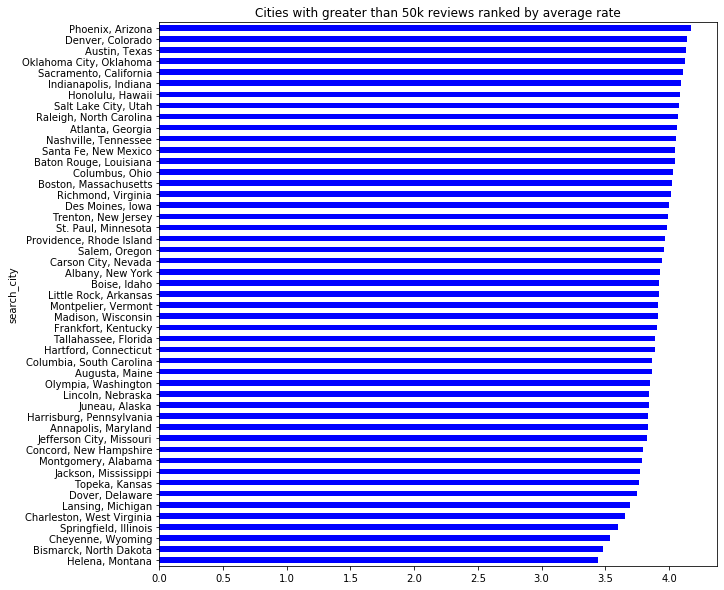

In [46]:
#cities with greater than 5k reviews
city_business_reviews[city_business_reviews.review_count > 5000]['rating'].sort_values()\
.plot(kind='barh', stacked=False, figsize=[10,10], colormap='winter')
plt.title('Cities with greater than 50k reviews ranked by average rate')
plt.show()

In [39]:
#Distribution of rating
df['rating'].value_counts()

4.0    10787
4.5     7411
3.5     5076
3.0     1930
5.0     1600
2.5      706
2.0      202
1.0       77
1.5       60
Name: rating, dtype: int64

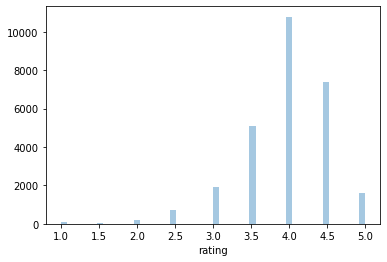

In [45]:

# y=4.0, 4.5, 3.5, 
# x=
sns.distplot(df.rating, kde=False)

In [40]:
#pie chart
# Labels for the sections of our pie chart
labels = ["American", "Mexican", "Japanese", "Italian "]

# The values of each section of the pie chart
sizes = [325, 188, 211, 197]
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "b"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

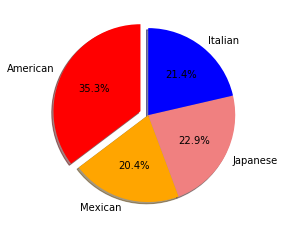

In [41]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

In [42]:
#select cities
cities= ['']